<a href="https://colab.research.google.com/github/ZeeMurphy/Data110/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Global Patterns of CO2 Emissions and Economic Indicators:** A Data-Driven Analysis  
Author: Zivar S Murphy, December 18, 2024


In [108]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d
import folium
from folium.plugins import HeatMap

The dataset titled "World Data," which I will be analyzing, contains information on various socio-economic and environmental indicators for 195 countries worldwide. It includes 35 columns, covering a broad range of data points, such as demographic information, economic indicators, healthcare statistics, and environmental measures. Key variables in the dataset include CO₂ emissions, gasoline prices, GDP, birth rate, life expectancy, population density, forested area percentage, and GDP per capita.

This report focuses on examining the relationships between CO₂ emissions, GDP, GDP per capita, forested area percentage, population, and gasoline prices, and how these factors interact with one another. By analyzing these indicators, the goal is to explore how economic development, environmental sustainability, and population size influence each other. Specifically, the analysis will investigate whether higher GDP and gasoline prices correlate with increased or decreased CO₂ emissions, and how the percentage of forested area and population size may impact these outcomes.

The dataset provides valuable insights into global trends in environmental and economic factors, offering an opportunity to assess the complex interconnections between these variables across different countries.

The dataset is available [here](https://data.niaid.nih.gov/resources?id=zenodo_8165228) from the Niaid Data Discovery Portal, National Institute of Allergy and Infectious Diseases, U.S. Department of Health and Human Services, 20 July 2023.

**EDA process:**   
The dataset consists of both numerical and categorical data. However, upon closer inspection, some of the numerical data is incorrectly formatted as objects. Additionally, there are missing values throughout the dataset. To begin the exploratory data analysis (EDA), the first step is to clean the dataset. This involves replacing missing values with NaN, removing extraneous symbols such as dollar signs ($) and percentage signs (%), and coercing the relevant columns into appropriate numerical formats for further analysis. This cleaning process will ensure that the dataset is in a usable state for analysis and visualization.

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/ZeeMurphy/Data110/refs/heads/main/Dataset/world-data-2023.csv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [111]:
df.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [112]:
missing_values_count = df.isnull().sum().sum()
missing_values_count

341

In [113]:
missing_data_check = df.isna() | (df == "")
missing_data_count = missing_data_check.sum()
print("Count of missing data (NaN, None, or empty strings) per column:")
print(missing_data_count)

Count of missing data (NaN, None, or empty strings) per column:
Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality        

In [114]:
# remove $, %, commas, and replace empty or invalid cells with NaN
def clean_all_columns(col):
    return col.replace({'\$': '', ',': '', '%': '', '': np.nan, 'NaN': np.nan}, regex=True)

# cleaning function to the entire DataFrame
df = df.apply(clean_all_columns)


In [115]:
#Coerce specific columns to numeric in one line
columns_to_coerce = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Minimum wage', 'Out of pocket health expenditure', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']  # Replace with the list of columns you want to coerce
df[columns_to_coerce] = df[columns_to_coerce].apply(pd.to_numeric, errors='coerce')



In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    int64  
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    float64
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    float64
 10  CPI                       

Now that we have cleaned the dataset, we proceed with further Exploratory Data Analysis (EDA) to understand its structure, identify patterns, detect outliers, and uncover relationships between variables.   


The first graph is a scatter plot showing the CO₂ emissions of all countries, with countries represented on the x-axis and CO₂ emissions on the y-axis. Most of the countries appear in a horizontal line along the x-axis, indicating that their CO₂ emissions are relatively similar. However, there are a small number of outliers that stand apart from the rest, displaying significantly higher CO₂ emissions. These outliers represent the countries that contribute disproportionately to global CO₂ emissions. In the next step, we will focus on identifying these countries to understand their role in the global emission landscape.

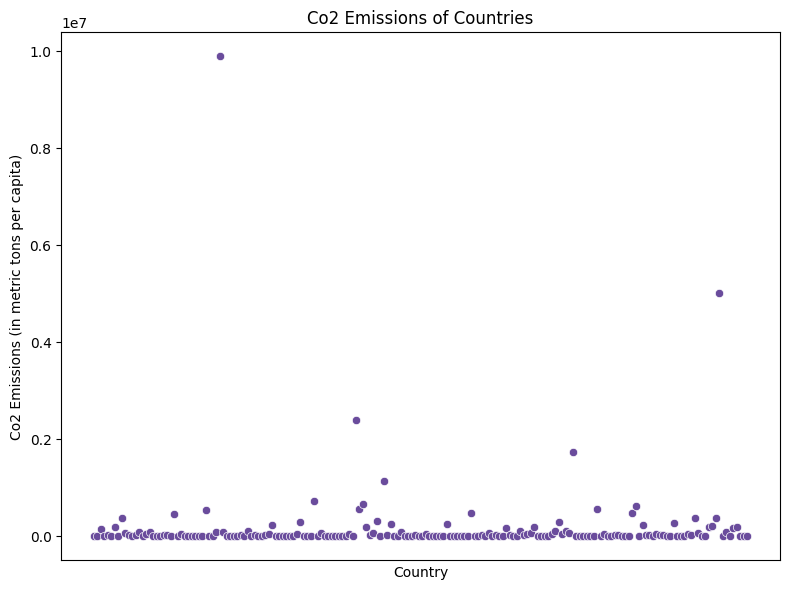

In [117]:
df = df.dropna(subset=['Co2-Emissions', 'Country'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Country', y='Co2-Emissions', data=df, color='#6a4c9c')
plt.xticks([])
plt.xlabel('Country')
plt.ylabel('Co2 Emissions (in metric tons per capita)')
plt.title('Co2 Emissions of Countries')
plt.tight_layout()
plt.show()


We can as well, look at the a KDE plot for distribution of Co2 emissions of the countries and we notice the skewedness of data with a long tail and a steep curve that shows the significant gap between some countries that pollute the environmen the most and the rest of the countries.

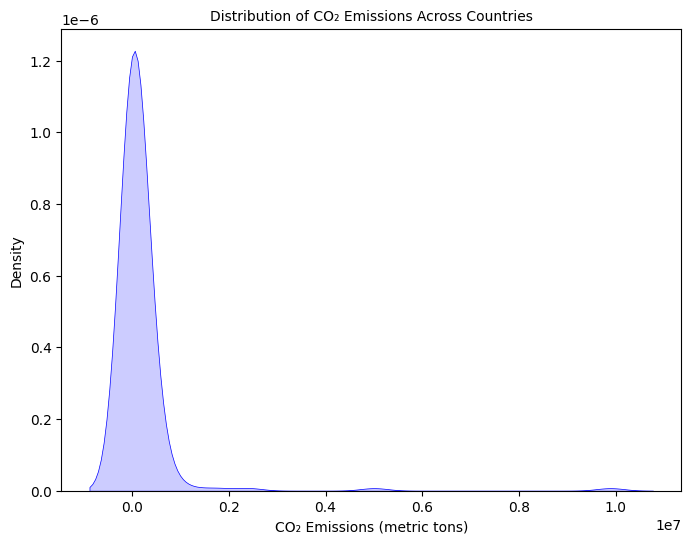

In [118]:
co2_emissions = df['Co2-Emissions'].dropna()
plt.figure(figsize=(8, 6))
sns.kdeplot(co2_emissions, fill=True, color='blue', alpha=0.2, linewidth=0.5)
plt.title('Distribution of CO₂ Emissions Across Countries', fontsize=10)
plt.xlabel('CO₂ Emissions (metric tons)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

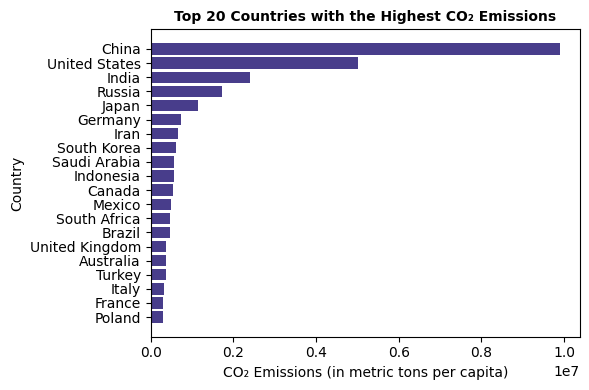

In [119]:
top_20_countries = df[['Country', 'Co2-Emissions']].dropna()
top_20_countries = top_20_countries.sort_values(by='Co2-Emissions', ascending=False).head(20)

top_20_countries = top_20_countries.sort_values(by='Co2-Emissions', ascending=True)

plt.figure(figsize=(6, 4))
plt.barh(top_20_countries['Country'], top_20_countries['Co2-Emissions'], color='darkslateblue')
plt.xlabel('CO₂ Emissions (in metric tons per capita)')
plt.ylabel('Country')
plt.title('Top 20 Countries with the Highest CO₂ Emissions', fontsize=10, weight='bold')
plt.tight_layout()
plt.show()


Next,the bubble plot provides an insightful visualization of CO2 emissions and GDP for countries across the globe using the georaphical indicators, with the size of the bubbles representing the CO2 emissions and the color indicating GDP. The plot offers a geographical view of the data, where each bubble corresponds to a country based on its geographic location (latitude and longitude).    
The top five countries in terms of CO2 emissions — China, the US, Russia, India, and Japan — are prominently visible in the plot. These countries have significantly larger bubbles, indicating their higher levels of CO2 emissions compared to others. The colors of the bubbles, which are determined by GDP, show that these countries also tend to have higher GDP values, with China and the US particularly standing out in both CO2 emissions and GDP.             
the bubble plot effectively showcases the relationship between a country's CO2 emissions and its economic status. It highlights the role of major global economies in contributing to CO2 emissions, with a noticeable correlation between higher GDP and increased CO2 output, particularly in the top five countries.

In [120]:
# Full dataset
df['Size'] = df['Co2-Emissions'] / 1000  # Scale bubble size for visualization
df['Color'] = df['GDP'] / 1e4            # Normalize GDP values for color intensity



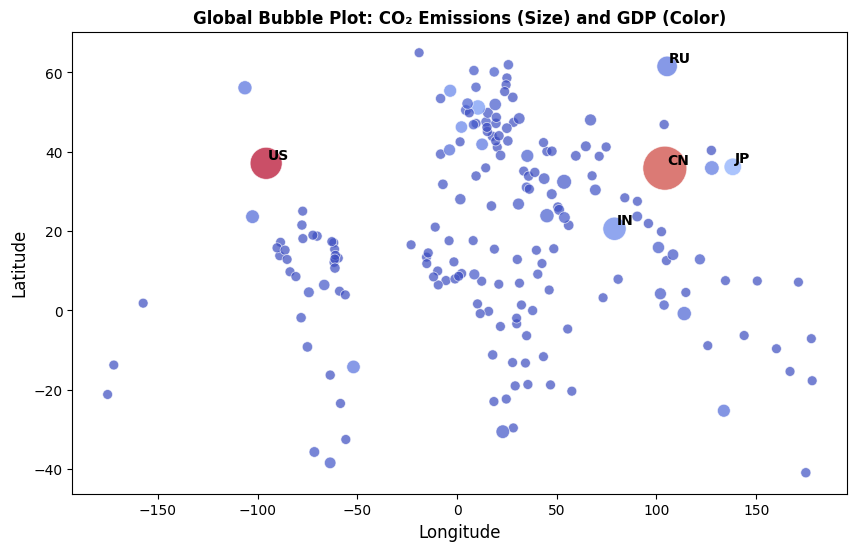

In [121]:
top_5_countries = df.nlargest(5, 'Co2-Emissions')

plt.figure(figsize=(10, 6))
bubble_plot = sns.scatterplot(
    x='Longitude',
    y='Latitude',
    size='Co2-Emissions',   # Bubble size
    hue='GDP',              # Bubble color
    sizes=(50, 1000),       # Size range for bubbles
    palette='coolwarm',     # Color palette
    data=df,
    alpha=0.7               # Transparency
)

for _, row in top_5_countries.iterrows():
    plt.text(
        row['Longitude'] + 1,  # Adjust to avoid overlapping bubbles
        row['Latitude'] + 1,
        row['Abbreviation'],   # Use abbreviation column
        fontsize=10, color='black', weight='bold'
    )

plt.title('Global Bubble Plot: CO₂ Emissions (Size) and GDP (Color)', fontsize=12, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
bubble_plot.legend_.remove()  # Remove legend if desired
plt.show()


Through the following plots, I try to show if the top 20 countries with the highest Co2 emission, also have the comparative high GDP.   
Plot 1: The first bar graph shows the top 20 countries based on CO2 emissions. The countries are ranked in descending order, with the largest bars representing the highest CO2 emitters.   
Plot 2: The second bar graph shows the GDP of the same top 20 countries based on their CO2 emissions. It is evident that the countries with the largest CO2 emissions also rank among the highest in terms of GDP, suggesting a correlation between economic power and CO2 output.   
Both graphs clearly demonstrate that the top four countries with the highest CO2 emissions — China, the US, Russia, and India — are also the ones with the highest GDPs, reflecting their large-scale industrial and economic activities. This supports the idea of a strong relationship between a country’s economic output and its environmental impact.

In [122]:
top_20 = df.nlargest(20, 'Co2-Emissions')

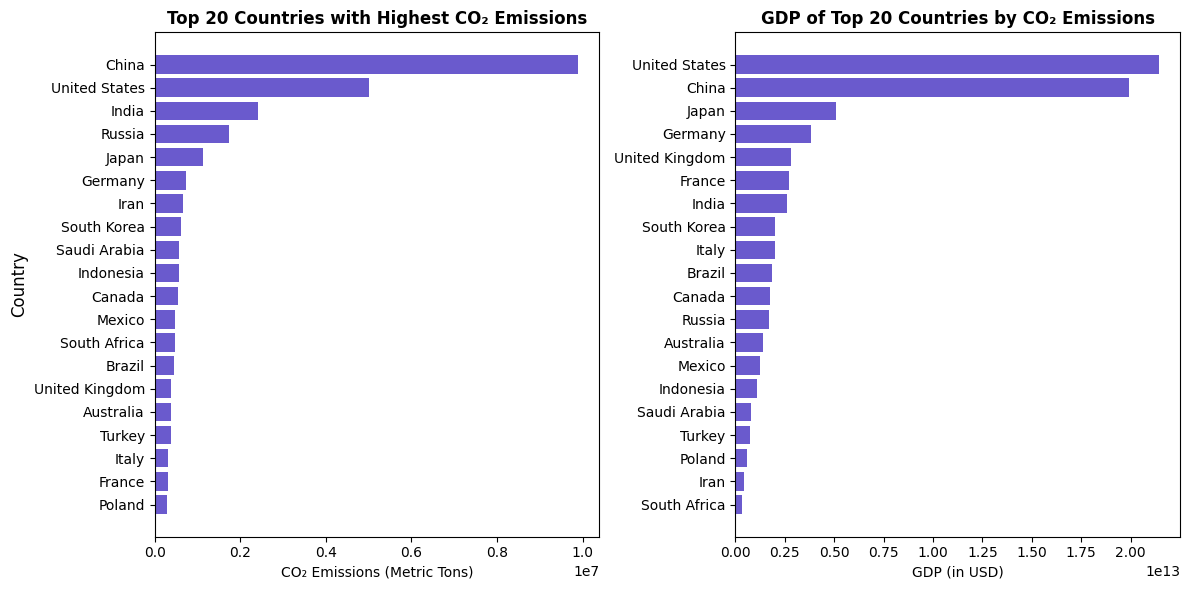

In [123]:
top_20_countries_sorted = df[['Country', 'Co2-Emissions', 'GDP']].dropna()
top_20_countries_sorted = top_20_countries_sorted.sort_values(by='Co2-Emissions', ascending=False).head(20)

top_20_countries_sorted = top_20_countries_sorted.sort_values(by='Co2-Emissions', ascending=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Make the figure more compact
ax1.barh(top_20_countries_sorted['Country'], top_20_countries_sorted['Co2-Emissions'], color='slateblue')
ax1.set_title('Top 20 Countries with Highest CO₂ Emissions', fontsize=12, weight='bold')
ax1.set_xlabel('CO₂ Emissions (Metric Tons)', fontsize=10)
ax1.set_ylabel('Country', fontsize=12)
top_20_countries_sorted = top_20_countries_sorted.sort_values(by='GDP', ascending=True)  # Reverse for GDP plot
ax2.barh(top_20_countries_sorted['Country'], top_20_countries_sorted['GDP'], color='slateblue')
ax2.set_title('GDP of Top 20 Countries by CO₂ Emissions', fontsize=12, weight='bold')
ax2.set_xlabel('GDP (in USD)', fontsize=10)
ax2.set_ylabel('')
plt.tight_layout()
plt.show()



Gross Domestic Product (GDP) measures the total economic output of a country, reflecting the monetary value of all goods and services produced within its borders during a specific period. While GDP provides an overview of a country’s overall economic strength, it does not consider population size, which can lead to misleading comparisons between countries with vastly different populations.

To address this, GDP per capita is used as an alternative metric. It is calculated by dividing a country’s GDP by its population, providing a clearer picture of the average economic output per individual. This measure is particularly useful for assessing the standard of living and economic well-being of a country’s citizens. Countries with similar GDPs may have vastly different GDP per capita values due to variations in population size.

Adding GDP Per Capita to the Dataset

Since the dataset initially only included GDP, I added a new column for GDP per capita by dividing each country’s GDP by its population. This additional metric allows for a more detailed analysis by enabling comparisons of economic output on a per-person basis, rather than just the overall economic performance of a country.

In [124]:
df['GDP per Capita'] = df['GDP'] / df['Population']
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Size,Color,GDP per Capita
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,8.672,1.910135e+06,502.115487
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,4.536,1.527808e+06,5352.857411
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,150.006,1.699882e+07,3948.343279
3,Andorra,164,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,0.469,3.154058e+05,40886.391162
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,34.693,9.463542e+06,2973.591160


The scatter plot of GDP per capita and CO2 emissions does not reveal a strong correlation. Most countries, regardless of their GDP per capita levels, produce similar amounts of CO2 emissions. However, a few outliers stand out, exhibiting significantly higher CO2 emissions. This pattern closely mirrors the trends observed with GDP, indicating that while economic metrics like GDP and GDP per capita may influence emissions, other factors likely play a more substantial role in determining a country's CO2 output.

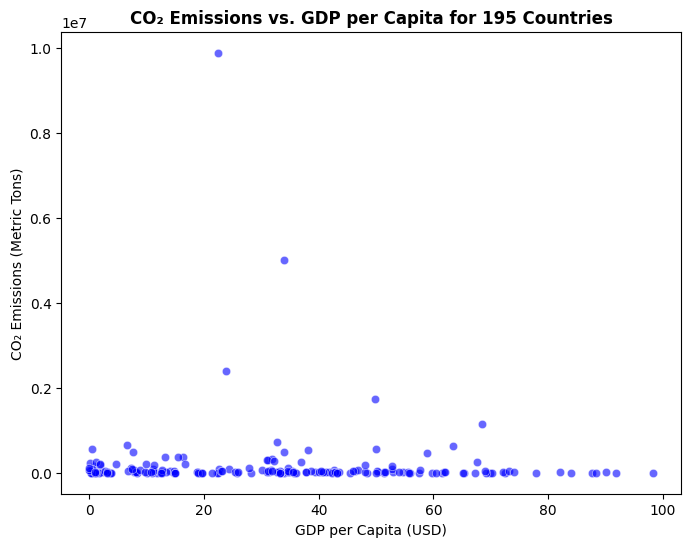

In [125]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Forested Area (%)',
    y='Co2-Emissions',
    data=df,
    alpha=0.6,
    color='blue'
)
plt.title('CO₂ Emissions vs. GDP per Capita for 195 Countries', fontsize=12, weight='bold')
plt.xlabel('GDP per Capita (USD)', fontsize=10)
plt.ylabel('CO₂ Emissions (Metric Tons)', fontsize=10)
plt.show()


However, the following scatter plot shows a strong connection between GDP and CO2 emissions, although there are some extreme outliers. This means that as a country's economy grows and produces more goods and services (measured by GDP), it generally emits more CO2. While GDP doesn't tell us how wealth is shared among people, it is still an important measure of a country's overall economic activity.

The plot makes it clear that countries with higher GDPs tend to release more CO2, likely due to more industrial activity and energy use. However, the outliers suggest that other factors, like how energy is produced, population size, or industrial efficiency, also play a role. This comparison helps us understand the link between economic growth and environmental impact.

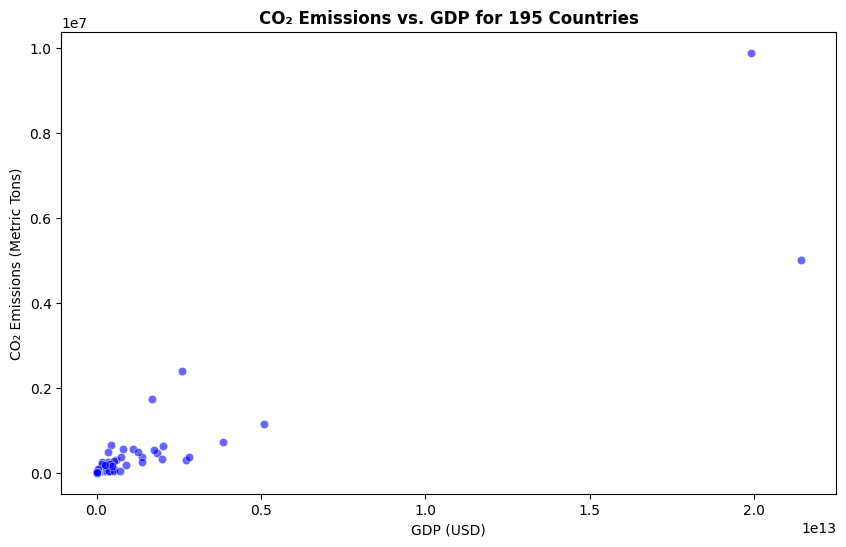

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='GDP',
    y='Co2-Emissions',
    data=df,
    alpha=0.6,
    color='blue'
)
plt.title('CO₂ Emissions vs. GDP for 195 Countries', fontsize=12, weight='bold')
plt.xlabel('GDP (USD)', fontsize=10)
plt.ylabel('CO₂ Emissions (Metric Tons)', fontsize=10)
plt.show()


Let's look at the correlation between Co2 emission and forested area percentage. Can we assume countries that have the highest percentage of forested area, would contribute less to Co2 emission?

In [127]:
mapping_data = df[['Country', 'Forested Area (%)', 'Co2-Emissions' ]]
fig = px.choropleth(
    mapping_data,
    locations="Country",
    locationmode="country names",
    color="Forested Area (%)",
    hover_name="Country",
    title="Choropleth Map of Forested Area (%)",
    color_continuous_scale=px.colors.sequential.YlGn,
)
fig.show()


fig = px.choropleth(
    mapping_data,
    locations="Country",
    locationmode="country names",
    color="Co2-Emissions",
    hover_name="Country",
    title="Choroplethe Map of Co2 Emissions by Country",
    color_continuous_scale=px.colors.sequential.YlGn,
)
fig.show()
fig.write_html('choropleth_map.html')

Let’s explore the relationship between CO2 emissions and the percentage of forested area in each country. Can we assume that countries with a higher percentage of forest cover contribute less to CO2 emissions?

Based on the data, there doesn't appear to be a strong overall correlation between these two factors. For example, Russia, the United States, and Brazil have relatively high percentages of forested area, yet they are among the largest CO2 emitters. This suggests that factors like industrial activity and energy consumption outweigh the potential benefits of forest coverage in reducing emissions.

However, a different trend can be observed in certain regions, such as Northern South America and parts of Africa. In these areas, countries with a higher percentage of forested land tend to have lower CO2 emissions, indicating a possible regional correlation. Despite this localized pattern, the global data overall shows little to no clear relationship between forest cover and CO2 emissions. This highlights the complexity of environmental factors affecting CO2 levels.


**Analysis of Urbanization's Impact on CO2 Emissions**  
To examine whether urbanization influences CO2 emissions, we plotted a scatter graph to analyze the relationship between the urban population and CO2 emissions. The resulting plot reveals a strong positive correlation between the two variables.   

As the urban population increases, CO2 emissions also tend to rise significantly. This relationship makes sense, as urbanization often brings higher energy demands, industrial activity, transportation, and infrastructure development—all of which contribute to higher CO2 emissions.   

The scatter plot also highlights this correlation visually, with larger bubbles and darker hues representing higher urban populations. These markers align with higher CO2 emission levels, emphasizing the connection between urban growth and environmental impact.   

This observation underscores the need for sustainable urban development practices to mitigate the environmental consequences of growing urbanization.

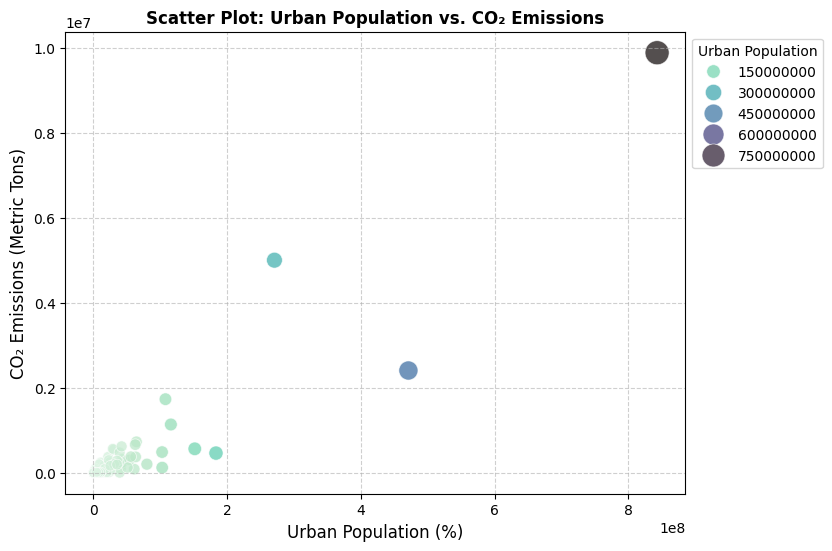

In [128]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Urban_population',
    y='Co2-Emissions',
    data=df,
    hue='Urban_population',
    palette='mako_r',
    size='Urban_population',
    sizes=(50, 300),
    alpha=0.7
)
plt.title('Scatter Plot: Urban Population vs. CO₂ Emissions', fontsize=12, weight='bold')
plt.xlabel('Urban Population (%)', fontsize=12)
plt.ylabel('CO₂ Emissions (Metric Tons)', fontsize=12)
plt.legend(title="Urban Population", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Analyzing the Impact of Gasoline Prices on CO2 Emissions**
To further explore potential factors influencing CO2 emissions, we examined whether gasoline prices have any impact. Using heatmaps to visualize the correlation matrix, we identified a correlation coefficient of -0.07 between gasoline prices and CO2 emissions.

This very weak negative correlation suggests that changes in gasoline prices have little to no significant impact on CO2 emissions. While higher gasoline prices might discourage fuel consumption and promote more energy-efficient practices, other factors such as industrial activities, energy policies, and alternative fuel use may play a more dominant role in determining overall CO2 emissions.

The lack of a stronger correlation highlights the complexity of factors driving CO2 emissions and suggests that simply adjusting gasoline prices may not be sufficient to achieve substantial environmental improvements.

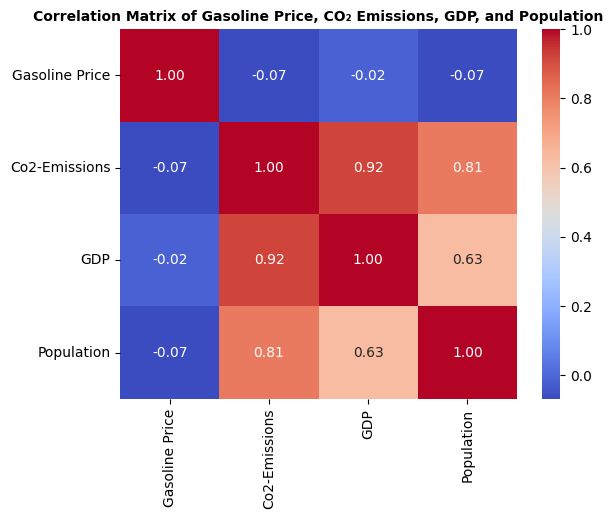

In [129]:
corr_matrix = df[['Gasoline Price', 'Co2-Emissions', 'GDP', 'Population']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Gasoline Price, CO₂ Emissions, GDP, and Population', fontsize=10, weight='bold')
plt.show()


In [130]:
df_clean = df.dropna(subset=['Gasoline Price', 'Co2-Emissions']).copy()
df_clean = df_clean[df_clean['Gasoline Price'] > 0]

# Clip the Co2-Emissions column to the 95th percentile
df_clean['Co2-Emissions'] = df_clean['Co2-Emissions'].clip(upper=df_clean['Co2-Emissions'].quantile(0.95))

# Create the treemap
fig = px.treemap(df_clean,
                 path=['Country'],
                 values='Gasoline Price',
                 color='Co2-Emissions',
                 color_continuous_scale='Purples',  # Purple color scale
                 title='Gasoline Prices vs. CO₂ Emissions by Country')

fig.show()
fig.write_html('gasoline_vs_co2_treemap.html')

##**Conclusion**
This analysis examined the relationships between CO2 emissions and factors such as GDP, GDP per capita, forested area percentage, urbanization, and gasoline prices. Key findings include:  

*   **Economic Indicators:** A strong positive correlation exists between GDP and CO2 emissions, suggesting that wealthier countries tend to emit more. However, GDP per capita does not show a similar trend, highlighting the impact of wealth distribution.  
*  **Forested Area:** No clear global correlation was found between forest cover and emissions, as major emitters like Russia, the U.S., and Brazil also have large forested areas.   

*   **Urbanization:** A strong positive correlation between urban population and CO2 emissions indicates that urbanization is a significant driver of emissions.    

*   **Gasoline Prices:** The weak negative correlation between gasoline prices and emissions suggests that pricing alone is not enough to reduce emissions.   

##**Implications**
These findings underscore the complex nature of CO2 emissions, influenced by economic growth, urbanization, and energy consumption. Policies targeting sustainable urban planning, renewable energy, and energy efficiency could help reduce emissions, while forest preservation alone may not be sufficient.   

##**Suggestions for Future Research**  

<u>Emissions by Sector:</u> It would be helpful to look at specific industries, such as transportation and manufacturing, to see which ones contribute the most to CO2 emissions and where changes could be made.

<u>Long-Term Trends:</u> Studying how CO2 emissions have changed over the years can give a better understanding of how economic growth and policies affect emissions over time.

<u>Policy Impact:</u> Researching how effective policies like carbon taxes or incentives for clean energy are in reducing emissions could help improve climate strategies.

<u>Regional Differences:</u> Exploring how different regions, with their unique challenges and resources, can tailor their approach to reducing CO2 emissions.

Future research in these areas could provide valuable insights for more targeted and effective solutions to combat climate change.